<a href="https://colab.research.google.com/github/priscillaboat/priscillaboat/blob/master/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving top2018.csv to top2018.csv


In [0]:
import scipy as sp
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
import seaborn
import warnings
warnings.filterwarnings("ignore")
import seaborn as seabornInstance 
from sklearn import metrics
%matplotlib inline

# R-squared and Adjusted R-squared Test


R squared and Adjusted R squared show differnet things. In general, R-sqaured is a measure of fit. It is a measure in statistics which measures how close the data fits the regression line. The issue is that R-sqaured tends to be easy to overfit the data. Thus we also use adjusted R-squared. This increases if and only if the new added predictor variable improved the model more than it would due to chance. We ca see the differences below


In [0]:
#reading in data 
data = pd.read_csv("top2018.csv")
#add populaity column
pop= list(range(1, 101))
data['popularity'] = pop
#split into X and Y
X = data.iloc[:,3:16]
y = data.iloc[:,16:]

#from sklearn
model = LinearRegression()
model.fit(X, y)
R = model.score(X, y)
aR = 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print("R-squared w loudness + duration: " + str(R)) #gives us the r squared using sklearn
print("R-squared adjusted w loudness + duration: " + str(aR))

R-squared w loudness+ duration: 0.16381516680610708
R-squared adjusted w loudness + duration: 0.03741513388144879


In [0]:
#repeat with all variables removing duration 
data2 = data.drop(columns=['duration_ms'])
X2 = data2.iloc[:100,3:15]
y2 = data2.iloc[:100,15:]

model2 = LinearRegression()
model2.fit(X2, y2)
R2 = model2.score(X2, y2)
aR2 = 1 - (1-model2.score(X2, y2))*(len(y2)-1)/(len(y2)-X2.shape[1]-1)
print("R-squared w/ loudness: " + str(R2))
print("R-squared adjusted w/ loudness: " + str(aR2))

R-squared w/ loudness: 0.1636180115823238
R-squared adjusted w/ loudness: 0.04825497869712703


In [0]:
#repeat with also removing loudness 
data3 = data.drop(columns=['loudness'])
X3 = data3.iloc[:,3:14]
y3 = data3.iloc[:,14:]

model3 = LinearRegression()
model3.fit(X3, y3)
R3 = model3.score(X3, y3)
aR3 = 1 - (1-model3.score(X3, y3))*(len(y3)-1)/(len(y3)-X3.shape[1]-1)
print("R-squared w/o loudness/duration: " + str(R3))
print("R-squared adjusted w/o loudness/duration: " + str(aR3))
#we can see pattern in increasing r squared adjusted while decreasing r-squared as we remove parameters 

R-squared w/o loudness/duration: 0.1635901836136768
R-squared adjusted w/o loudness/duration: 0.05903895656538649


**Visualizing Difference Between R-sqaured and Adjusted R-squared**

We can see how removing parameters actually increased the adjusted R-squared whereas removing parameters decreased R-squared. This means these parameters were actually not useful to our model, and having them penalized our adjusted R-squared value. 

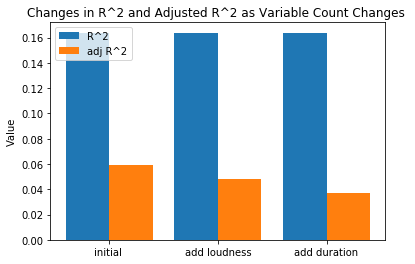

In [0]:
#shows changes in R-squared and adjusted R-squared 
X = ['initial ','add loudness','add duration']
Y = [R3,R2,R]
Z = [aR3,aR2,aR]
_X = np.arange(len(X))

plt.bar(_X - 0.2, Y, 0.4)
plt.bar(_X + 0.2, Z, 0.4)
plt.xticks(_X, X) # set labels manually
plt.title('Changes in R^2 and Adjusted R^2 as Variable Count Changes ')
plt.legend(('R^2','adj R^2'), loc='upper left')
plt.ylabel("Value")
plt.show()

[0.1635901836136768, 0.1636180115823238, 0.16381516680610708]


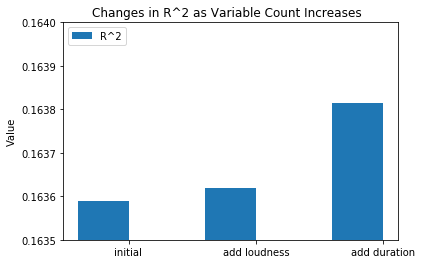

In [0]:
X = ['initial ','add loudness','add duration']
Y = [R3,R2,R]
print(Y)
_X = np.arange(len(X))

plt.bar(_X - 0.2, Y, 0.4)
plt.xticks(_X, X) # set labels manually
plt.title('Changes in R^2 as Variable Count Increases  ')
plt.legend(('R^2','adj R^2'), loc='upper left')
plt.ylabel("Value")
plt.ylim([.1635, .164])
plt.show()

[0.05903895656538649, 0.04825497869712703, 0.03741513388144879]


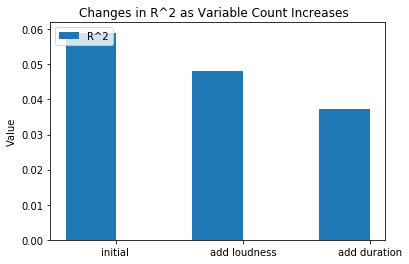

In [0]:
X = ['initial ','add loudness','add duration']
Y = [aR3,aR2,aR]
print(Y)
_X = np.arange(len(X))

plt.bar(_X - 0.2, Y, 0.4)
plt.xticks(_X, X) # set labels manually
plt.title('Changes in R^2 as Variable Count Increases  ')
plt.legend(('R^2','adj R^2'), loc='upper left')
plt.ylabel("Value")
plt.show()

In [0]:
X = data.iloc[:100,3:16]
y = data.iloc[:100,16:]
X = X[['liveness','loudness','key','tempo']]

model = LinearRegression()
model.fit(X, y)
print("R-squared : " + str(model.score(X, y))) #gives us the r squared using sklearn 
print("R-squared adjusted: " + str(1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)))

R-squared: 0.1325949764443045
R-squared adjusted: 0.09607265966301204


# Mean Squared Error and Other Forms of Error

To measure the model’s success, data scientists have developed error metrics to judge just how well the predicted and actual values match up. The difference between our expected and predicted values is called the set of residuals. Data scientists take this collection of residuals to compute a single condensed summary statistic. There are many of these summary statistics, however, we will go over Mean Squared Error, Mean Absolute Error, Root Mean Squared Error, Mean Absolute Percentage Error, and Mean Percentage Error.

In [0]:
## MSE and other forms of error

data = pd.read_csv("top2018.csv")
rank = list(range(100))
data['Rank'] = rank
drop_cols = ['id','artists','danceability','energy','mode','speechiness','acousticness','instrumentalness','valence','duration_ms','time_signature']
df = data.drop(drop_cols,axis=1)


train_exp = df.iloc[:95,1:5]
train_res = df.iloc[:95,5:]
test_exp = df.iloc[95:,1:5]
test_act = df.iloc[95:,5:]

class MLR:
  def __init__(self,w1,x1,y1,z1):
    self.w1 = w1
    self.x1 = x1
    self.y1 = y1
    self.z1 = z1
    
  def fit_pred(self):
    LR = LinearRegression()
    LR.fit(self.w1,self.x1)
    return LR.predict(self.y1)
  
matr_exp = MLR(train_exp,train_res,test_exp,test_act)
predicted = matr_exp.fit_pred()
print('Actual Value')
print(test_act)

print('Predicted Value')
print(predicted)

mae = mean_absolute_error(test_act,predicted)#Mean Absolute Error
print(mae)

mse = mean_squared_error(test_act,predicted)#Mean Squared Error
print(mse)

Actual Value
    Rank
95    95
96    96
97    97
98    98
99    99
Predicted Value
[[44.76377645]
 [54.70197095]
 [60.04882599]
 [49.14796191]
 [44.21427934]]
46.424637073713164
2196.5182870405965


In [0]:
energy = data['energy'].values.reshape(-1,1)
loudness = data['loudness'].values.reshape(-1,1)

energy_train,energy_test,loudness_train,loudness_test = train_test_split(energy,loudness,test_size=0.2,random_state=0)

regressor = LinearRegression()
regressor.fit(energy_train,loudness_train)#training the algorithm

loudness_pred = regressor.predict(energy_test)

df = pd.DataFrame({'Actual': loudness_test.flatten(),'Predicted': loudness_pred.flatten()})

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
plt.scatter(energy_test, loudness_test,  color='gray')
plt.plot(energy_test, loudness_pred, color='red', linewidth=2)
plt.show()

**Mean Squared Error, Mean Absolute Error, Root Mean Squared Error**

Mean Squared Error represents the average squared difference between the actual and predicted values.

The Mean Absolute Error is one of the simplest error metrics. To arrive at the MAE, calculate the absolute value of each residual and average it out over the number of samples.

 The RMSE, or Root Mean Square Error, can be thought of as the standard deviation of the data. The purpose of taking the square root of the MSE is to make the scale (or unit) of the errors the same as that of the target (or response) variable.


In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(loudness_test, loudness_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(loudness_test, loudness_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(loudness_test, loudness_pred)))

**Mean Absolute Percentage Error, and Mean Percentage Error**

Mean Percentage Error (MPE) is similar to that of MAPE apart from the fact that it is missing the absolute value operation


In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  

  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(loudness_test, loudness_pred)) 

In [0]:
def mean_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) / y_true) * 100
  
print('Mean Percentage Error:', mean_percentage_error(loudness_test, loudness_pred))

With MAPE and MAE, negative and positive errors are cancelled out. However, if there are more negative or positive errors, this bias will show up in the MPE. Thus, MPE shows if there is a systematic overestimate or underestimate.


# Akaike and Bayesian Information Criteria

These two evaluators are used less often than error statistics and the coefficients of determination, but they are very helpful when it comes to comparing models.

AIC and BIC both measure the quality of a model and accounts for both overfitting and underfitting models. The main difference between the two is the BIC favors parsimonious models, penalizing for complexity or the addition of more parameters similarly to the adjusted R-squared.

In [0]:

data = pd.read_csv("top2018.csv")
del data['id']
del data['name']
del data['artists']
popularity = range(1,101)
data['popularity'] = popularity
#creating different models to test 
data1 = data[['liveness','popularity']]
data2 = data[['liveness','tempo','popularity']]
data3 = data[['liveness','tempo','loudness','popularity']]
data4 = data[['liveness','tempo','loudness','danceability','popularity']]
data5 = data[['liveness','tempo','loudness','danceability','energy','popularity']]
data6 = data[['liveness','tempo','loudness','danceability','energy','duration_ms','popularity']]
data7 = data[['liveness','tempo','loudness','danceability','energy','duration_ms','valence','popularity']]
data8 = data[['liveness','tempo','loudness','danceability','energy','duration_ms','valence','speechiness','popularity']]
data9 = data[['liveness','tempo','loudness','danceability','energy','duration_ms','valence','speechiness','acousticness','popularity']]
data10 = data[['liveness','tempo','loudness','danceability','energy','duration_ms','valence','speechiness','acousticness','instrumentalness','popularity']]
data11 = data[['liveness','tempo','loudness','danceability','energy','duration_ms','valence','speechiness','acousticness','instrumentalness','key','popularity']]
data12 = data[['liveness','tempo','loudness','danceability','energy','duration_ms','valence','speechiness','acousticness','instrumentalness','key','mode','popularity']]
data13 = data[['liveness','tempo','loudness','danceability','energy','duration_ms','valence','speechiness','acousticness','instrumentalness','key','mode','time_signature','popularity']]


In [0]:
#function to calculate the Akaike Information Criterion
def AICcalc(X):
  y = X['popularity']
  del X['popularity']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) #takes training set
  model = LinearRegression()
  model.fit(X_train, y_train) #fits linear regression line to training data
  inter = model.intercept_
  betas = model.coef_
  y_pred = model.predict(X_test) #predicts popularity of test data
  residuals = y_test - y_pred #finds difference between actual popularity and predicted popularity
  K= len(betas)
  n= len(X_test)
  AIC = float(n*math.log(sum(residuals**2)/n) + 2*K) #calculates AIC
  X['popularity'] = popularity
  return AIC

#function to calculate Bayesian Information Criterion
def BICcalc(X):
  y = X['popularity']
  del X['popularity']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
  model = LinearRegression()
  model.fit(X_train, y_train)
  inter = model.intercept_
  betas = model.coef_
  y_pred = model.predict(X_test)
  residuals = y_test - y_pred
  K= len(betas)
  n= len(X_test)
  BIC = float(K*math.log(n) + n*math.log(sum(residuals**2)/n)) #calculates BIC
  X['popularity'] = popularity
  return BIC

#function to repeat AIC and BIC calculation 10,000 times and find average
#useful since the sample size is small so AIC and BIC are highly dependent on testing data
def find_crit(X):
  rep = 10000
  totalA = 0
  totalB = 0
  for i in range(rep):
    totalA += AICcalc(X)
    totalB += BICcalc(X)
    return [totalA,totalB]
  avgAIC = totalA/rep
  avgBIC = totalB/rep
  return [avgAIC,avgBIC]

**Visualizing Model **

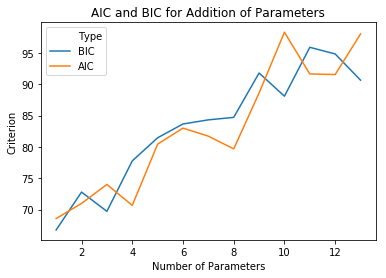

In [0]:
alldata = [find_crit(data1),find_crit(data2),find_crit(data3),find_crit(data4),find_crit(data5),find_crit(data6),find_crit(data7),find_crit(data8),find_crit(data9),find_crit(data10),find_crit(data11),find_crit(data12),find_crit(data13)]

criterion = pd.DataFrame(alldata, columns=['AIC','BIC'])
criterion['Number of Parameters'] = range(1,14)

allBIC = criterion[['BIC','Number of Parameters']]
allBIC = allBIC.rename(index=str, columns={"BIC":"Criterion"} )
allBIC['Type'] = 'BIC'
allAIC = criterion[['AIC','Number of Parameters']]
allAIC = allAIC.rename(index=str, columns={"AIC":"Criterion"} )
allAIC['Type'] = 'AIC'
crit = pd.concat([allBIC,allAIC])

comparison = seaborn.lineplot(crit['Number of Parameters'], crit['Criterion'], hue=crit['Type']).set_title('AIC and BIC for Addition of Parameters')
plt.savefig("comp.png")

From the graph, it’s clear to see that the addition of parameters increases both the AIC and BIC, but that the likely best model has 3 parameters (liveness, loudness, and tempo)

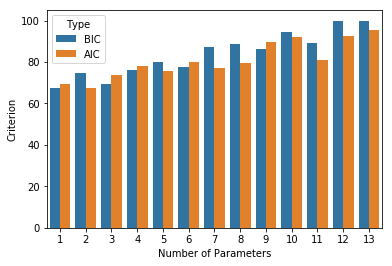

In [0]:
seaborn.barplot(x="Number of Parameters", y="Criterion",hue="Type", data=crit)